# PROJET 7

# IMPLEMENTEZ UN MODELE DE SCORING





## NOTEBOOK - FEATURE IMPORTANCE GLOBALE & LOCALE

In [1]:
#pip install wheel

In [2]:
#pip install daal==2021.4.0

In [3]:
#pip install numpy==1.20

In [4]:
#pip install xplotter

In [5]:
#pip install shap

In [6]:
conda list scikit

# packages in environment at C:\Users\helen\anaconda3:
Note: you may need to restart the kernel to use updated packages.

#
# Name                    Version                   Build  Channel
scikit-image              0.19.2           py39hf11a4ad_0  
scikit-learn              1.1.3                    pypi_0    pypi
scikit-learn-intelex      2021.6.0         py39haa95532_0  


In [7]:
#pip install numba==0.53.0

In [8]:
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier

import re

In [9]:
import shap

In [10]:
pkl_model= open("best_lgbm.pkl","rb")
best_LGBM=pd.read_pickle(pkl_model)

In [11]:
best_LGBM

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('estimator', LGBMClassifier())])

In [12]:
best_LGBM[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [13]:
best_LGBM[1]

SimpleImputer(strategy='median')

In [14]:
best_LGBM[2]

StandardScaler()

In [15]:
best_LGBM[:3]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [16]:
best_LGBM[4]

LGBMClassifier()

In [17]:
train=pd.read_csv('data_work/data_train.csv', sep ='\t')

In [18]:
train=train.sample(frac=0.5)
train.shape

(153756, 95)

In [19]:
train.head()

Unnamed: 0 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
140086      140086         Cash loans           F            N   
153367      153367         Cash loans           F            N   
78923        78923         Cash loans           M            N   
107734      107734         Cash loans           F            N   
120850      120850         Cash loans           F            N   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
140086          108000.0    172021.5      12991.5         148500.0   
153367          225000.0    369085.5      26379.0         342000.0   
78923           135000.0    314055.0      16164.0         238500.0   
107734          225000.0   1249740.0      66582.0        1125000.0   
120850          135000.0    142632.0      11398.5         126000.0   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  ...  \
140086             Pensioner  Secondary / secondary special  ...   
153367             Pensioner               Higher education  ...   
78923   Commercial associate  Secondary / secondary special  ...   
107734               Working  Secondary / secondary special  ...   
120850         State servant               Higher education  ...   

       PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
140086                                          4.750000   
153367                                          3.041667   
78923                                          12.130435   
107734                                          4.500000   
120850                                         12.404945   

        PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
140086                                     0.804110   
153367                                     0.640411   
78923                                      0.653306   
107734                                     4.187215   
120850                                     3.818674   

        PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
140086                                11435.978571   
153367                                50800.178250   
78923                                 15650.890435   
107734                                54598.625179   
120850                                10943.260810   

        PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  CREDIT_INCOME_PERCENT  \
140086                             11435.978571               1.592792   
153367                             54175.178250               1.640380   
78923                              15523.402011               2.326333   
107734                             54598.625179               5.554400   
120850                             10428.930695               1.056533   

        ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT TARGET  \
140086                0.120292    13.241081             -16.031383    0.0   
153367                0.117240    13.991641             -16.970681    0.0   
78923                 0.119733    19.429287               0.042462    1.0   
107734                0.295920    18.769938               0.201741    0.0   
120850                0.084433    12.513225               0.147210    0.0   

        SK_ID_CURR  
140086    262438.0  
153367    277769.0  
78923     191487.0  
107734    224991.0  
120850    240119.0  

[5 rows x 95 columns]

In [20]:
X=train.drop(['SK_ID_CURR','TARGET','Unnamed: 0'],axis=1)
X.shape

(153756, 92)

In [21]:
best_LGBM[:4]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler', RandomUnderSampler())])

In [22]:
y=train['TARGET']
y.shape

(153756,)

In [23]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
num_feat=X.select_dtypes(exclude=object).columns.to_list()

In [24]:
X_cat=X[cat_feat]
X_num=X[num_feat]

In [25]:
best_LGBM[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [26]:
# Créer une instance de OneHotEncoder
encoder = best_LGBM[0]
# Adapter l'encodeur aux données
encoder.fit(X_cat)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [27]:
feature_names_out = encoder.get_feature_names_out(input_features=X_cat.columns) # Obtenir les noms de colonnes étendus
X_cat_encoded = encoder.transform(X_cat) # Transformer les données
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=feature_names_out, index=X.index)# Convertir la matrice creuse en DataFrame


In [28]:
X_VF = pd.concat([X_num,X_cat_encoded_df],axis=1)

In [29]:
X_VF.shape

(153756, 191)

In [30]:
X_VF_Imputer=pd.DataFrame(best_LGBM[1].fit_transform(X_VF),columns=X_VF.columns)
X_VF_Imputer.shape

(153756, 191)

In [31]:
X_VF_Scaler=pd.DataFrame(best_LGBM[2].fit_transform(X_VF_Imputer),columns=X_VF_Imputer.columns)
X_VF_Scaler.shape

(153756, 191)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_VF_Scaler,y,test_size=0.2)

In [33]:

X_train_sample,y_train_sample=best_LGBM[3].fit_resample(X_train,y_train)

In [34]:
X_train_sample.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
54488          -0.685608   -0.632751    -0.944182        -0.652597   
104278         -0.551914   -1.040099    -1.248711        -0.969220   
98994          -0.551914    2.351971     1.251223         2.197013   
135080          6.801240    1.865219     2.790958         2.197013   
82757          -0.329092   -0.898498    -0.859970        -0.969220   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
54488                    -0.206548    1.137661      -2.140649   
104278                   -1.142909   -1.528287       0.463319   
98994                    -0.786882   -0.030182       0.468603   
135080                    1.832614    1.276646      -2.140649   
82757                    -1.356293    0.218661       0.510134   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  \
54488            0.133547         0.896193    -0.146149  ...   
104278          -0.387461        -0.622652    -0.006264  ...   
98994           -0.919553         0.628590    -0.146149  ...   
135080           1.640575         1.316806    -0.146149  ...   
82757            0.572410        -1.632786    -0.146149  ...   

        OneHot__ORGANIZATION_TYPE_Trade: type 4  \
54488                                 -0.013253   
104278                                -0.013253   
98994                                 -0.013253   
135080                                -0.013253   
82757                                 -0.013253   

        OneHot__ORGANIZATION_TYPE_Trade: type 5  \
54488                                 -0.011688   
104278                                -0.011688   
98994                                 -0.011688   
135080                                -0.011688   
82757                                 -0.011688   

        OneHot__ORGANIZATION_TYPE_Trade: type 6  \
54488                                 -0.044509   
104278                                -0.044509   
98994                                 -0.044509   
135080                                -0.044509   
82757                                 -0.044509   

        OneHot__ORGANIZATION_TYPE_Trade: type 7  \
54488                                 -0.160834   
104278                                -0.160834   
98994                                 -0.160834   
135080                                -0.160834   
82757                                 -0.160834   

        OneHot__ORGANIZATION_TYPE_Transport: type 1  \
54488                                      -0.02393   
104278                                     -0.02393   
98994                                      -0.02393   
135080                                     -0.02393   
82757                                      -0.02393   

        OneHot__ORGANIZATION_TYPE_Transport: type 2  \
54488                                     -0.086428   
104278                                    -0.086428   
98994                                     -0.086428   
135080                                    -0.086428   
82757                                     -0.086428   

        OneHot__ORGANIZATION_TYPE_Transport: type 3  \
54488                                     -0.062486   
104278                                    -0.062486   
98994                                     -0.062486   
135080                                    -0.062486   
82757                                     -0.062486   

        OneHot__ORGANIZATION_TYPE_Transport: type 4  \
54488                                     -0.133088   
104278                                    -0.133088   
98994                                     -0.133088   
135080                                    -0.133088   
82757                                     -0.133088   

        OneHot__ORGANIZATION_TYPE_University  OneHot__ORGANIZATION_TYPE_XNA  
54488                              -0.067725                       2.140890  
104278                             -0.067725                      -0.467095  
98994                    

In [35]:
X_train_sample.shape

(19686, 191)

### PARTIE 1 - FEATURE IMPORTANCE GLOBAL

In [36]:
X_train_sample = X_train_sample.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [37]:
# Récupération des shap_values par le paramètre `pred_contrib` de la fonction predict de LGBM
model_LGBM = best_LGBM[4].fit(X_train_sample, y_train_sample)



[LightGBM] [Info] Number of positive: 9843, number of negative: 9843
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15692
[LightGBM] [Info] Number of data points in the train set: 19686, number of used features: 172
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [38]:
shap_values_lgbm =  model_LGBM.predict(X_train_sample, pred_contrib=True)

In [39]:
# explain the model
explainer = shap.TreeExplainer(model_LGBM)
shap_values_all = explainer(X_train_sample)

In [40]:
print(f"Valeur de Référence moyenne : {shap_values_all.base_values[0]}")

Valeur de Référence moyenne : [-0.0026246  0.0026246]


### Diagramme des variables (Moyenne valeurs absolues)

In [41]:
shap_values = explainer.shap_values(X_train_sample)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [42]:
shap_values_df = pd.DataFrame(data=shap_values[1], columns=X_train_sample.columns)
shap_values_df.shape

(19686, 191)

In [43]:
shap_values_df.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          0.002575   -0.022686    -0.146171         0.084155   
1          0.017045   -0.074503    -0.215277         0.099187   
2          0.003318    0.123822     0.107270        -0.289550   
3         -0.046616    0.100167     0.033635        -0.262403   
4          0.019078   -0.059150    -0.171675         0.101803   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.007807   -0.159798       0.025364          -0.005829   
1                    0.020442   -0.010017      -0.012263          -0.002230   
2                    0.007414    0.028754      -0.069377           0.001926   
3                   -0.020056   -0.149396       0.075479          -0.022485   
4                    0.042255   -0.050539      -0.152440           0.003594   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  OneHot__ORGANIZATION_TYPE_Tradetype4  \
0        -0.042220     0.015846  ...                                   0.0   
1        -0.000516     0.015372  ...                                   0.0   
2        -0.018125     0.012676  ...                                   0.0   
3        -0.083694     0.024527  ...                                   0.0   
4         0.123199     0.017681  ...                                   0.0   

   OneHot__ORGANIZATION_TYPE_Tradetype5  OneHot__ORGANIZATION_TYPE_Tradetype6  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   OneHot__ORGANIZATION_TYPE_Tradetype7  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype2  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype3  \
0                                 -0.000629   
1                                 -0.000179   
2                                 -0.000206   
3                                 -0.000655   
4                                  0.000059   

   OneHot__ORGANIZATION_TYPE_Transporttype4  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_University  OneHot__ORGANIZATION_TYPE_XNA  
0                              0.000282                            0.0  
1                              0.000125                            0.0  
2                              0.000127                            0.0  
3                              0.000125                            0.0  
4                              0.000281                            0.0  

[5 rows x 191 columns]

In [44]:
print(f"Moyenne des valeurs absolues des valeurs de Shap :\n{shap_values_df.abs().mean().sort_values(ascending=False)}")

Moyenne des valeurs absolues des valeurs de Shap :
EXT_SOURCE_2                                  0.375437
EXT_SOURCE_3                                  0.330061
PREV_APPL_MEAN_CNT_PAYMENT                    0.128338
EXT_SOURCE_1                                  0.126076
AMT_GOODS_PRICE                               0.123835
                                                ...   
OneHot__ORGANIZATION_TYPE_Agriculture         0.000000
OneHot__ORGANIZATION_TYPE_Advertising         0.000000
OneHot__WEEKDAY_APPR_PROCESS_START_MONDAY     0.000000
OneHot__OCCUPATION_TYPE_Waitersbarmenstaff    0.000000
OneHot__ORGANIZATION_TYPE_XNA                 0.000000
Length: 191, dtype: float64


In [45]:
print(f"Moyenne des Moyenne des valeurs absolues des valeurs de Shap : {shap_values_df.abs().mean().mean():.2f}")

Moyenne des Moyenne des valeurs absolues des valeurs de Shap : 0.02


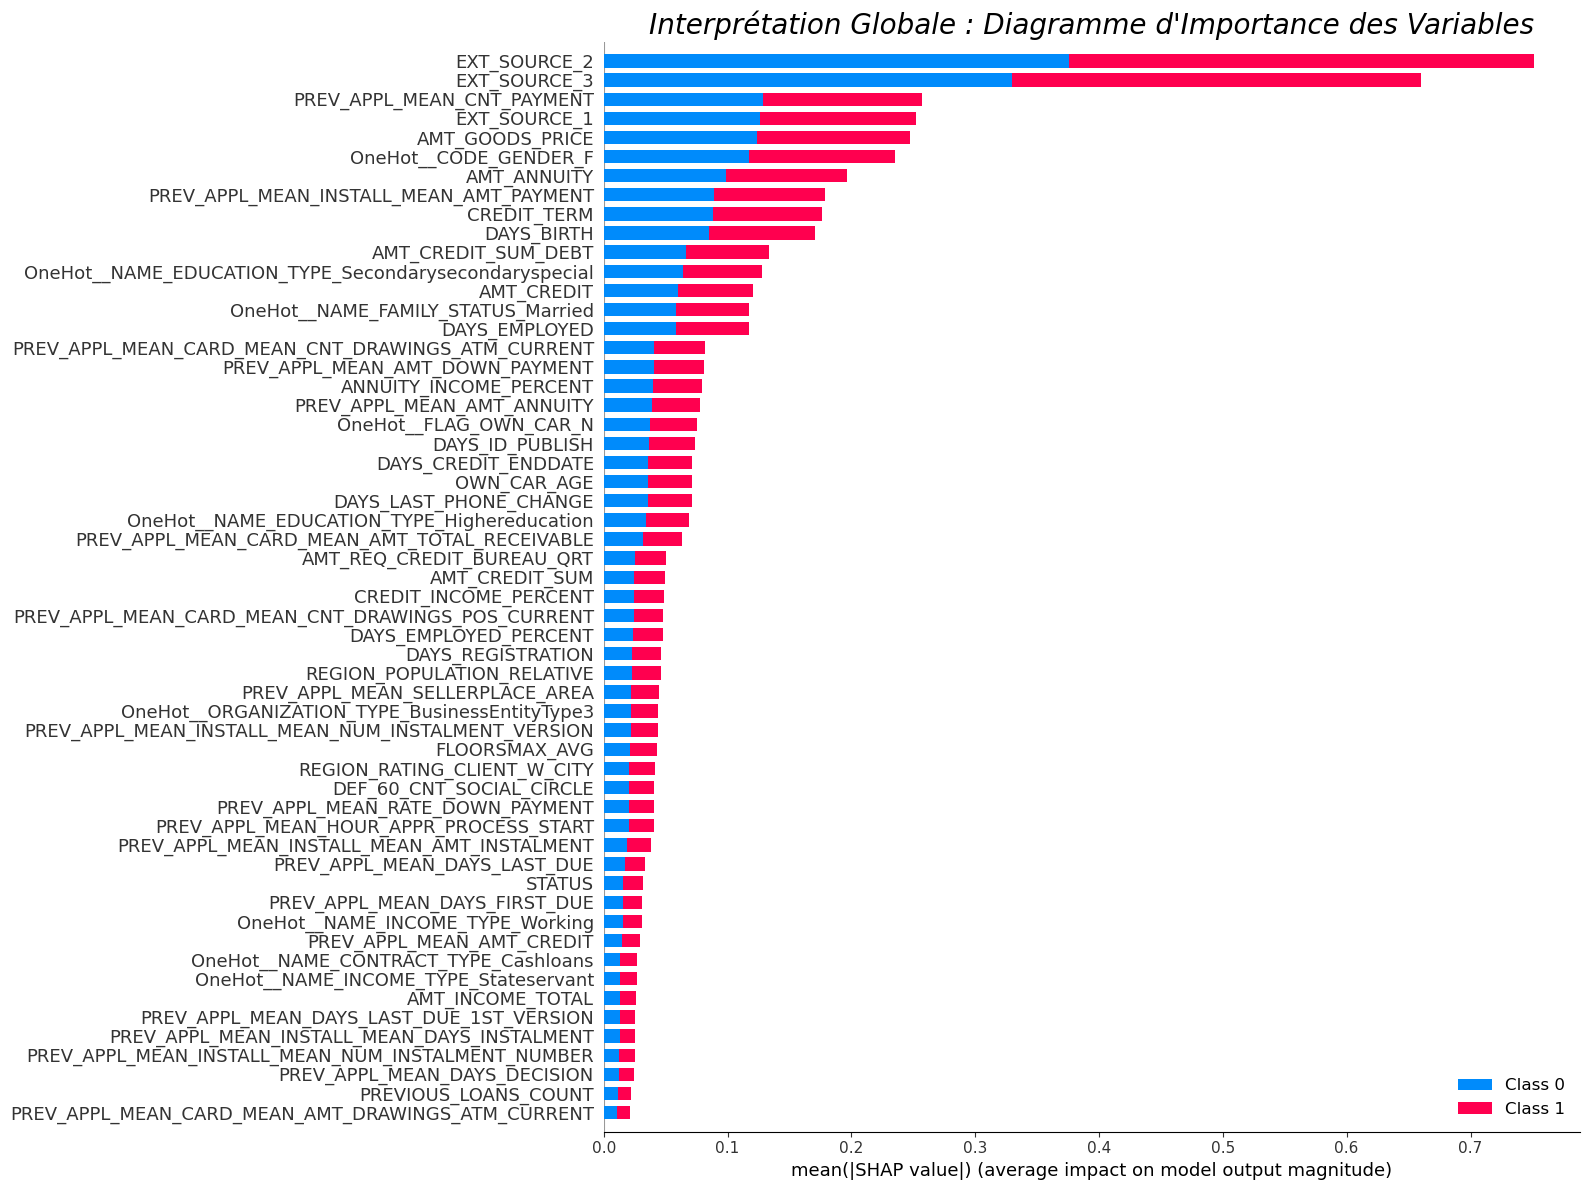

In [46]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 12),
                  plot_type="bar",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

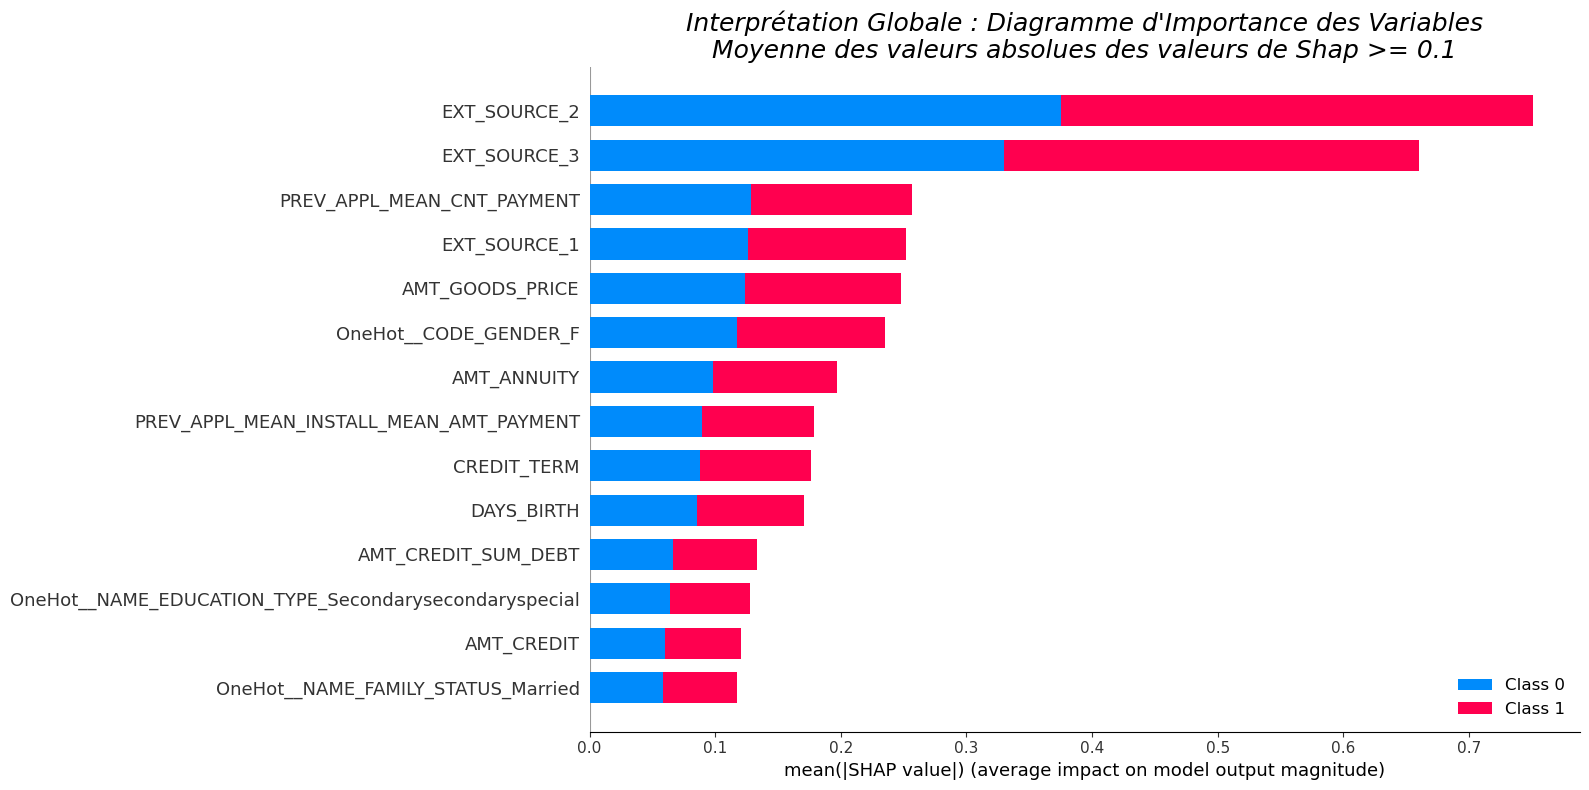

In [47]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 8),
                  plot_type="bar",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Diagramme des variables
Les valeurs de Shap sont représentées pour chaque variable dans leur ordre d’importance, chaque point représente une valeur de Shap (pour un client), les points rouges représentent des valeurs élevées de la variable et les points bleus des valeurs basses de la variable.

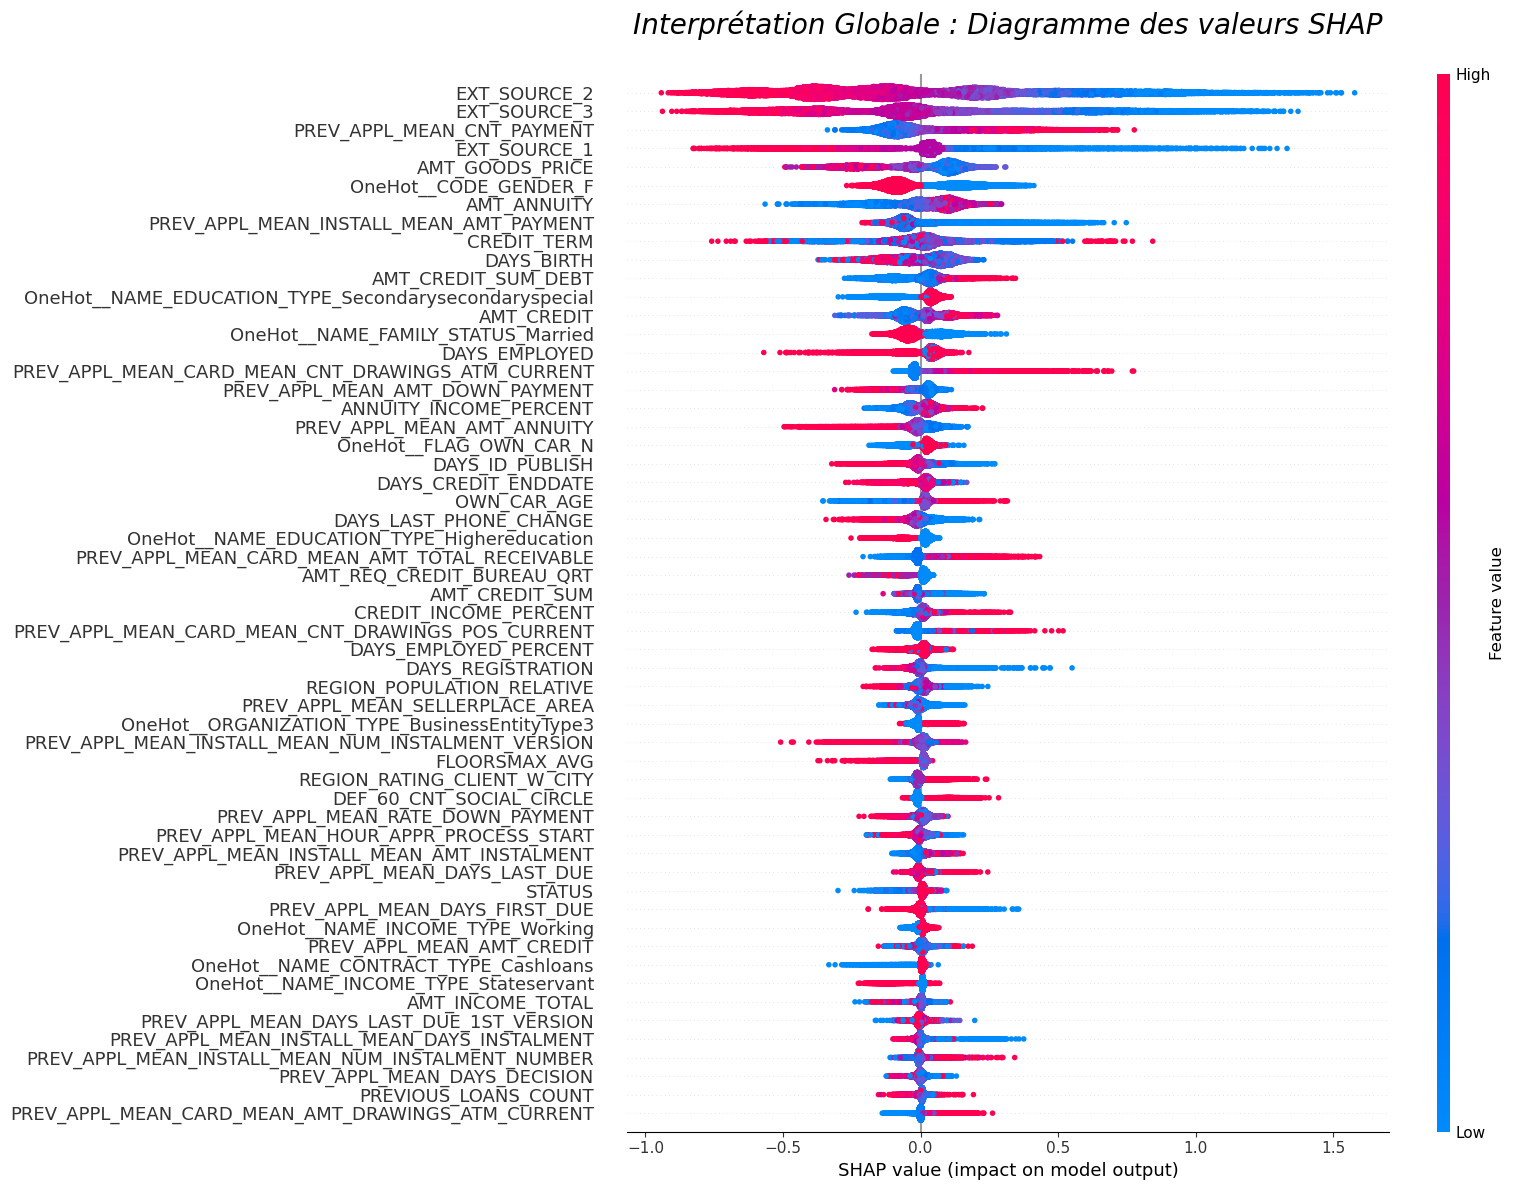

In [48]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=X_train_sample,
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 12),
                  plot_type="dot",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\n", 
          fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

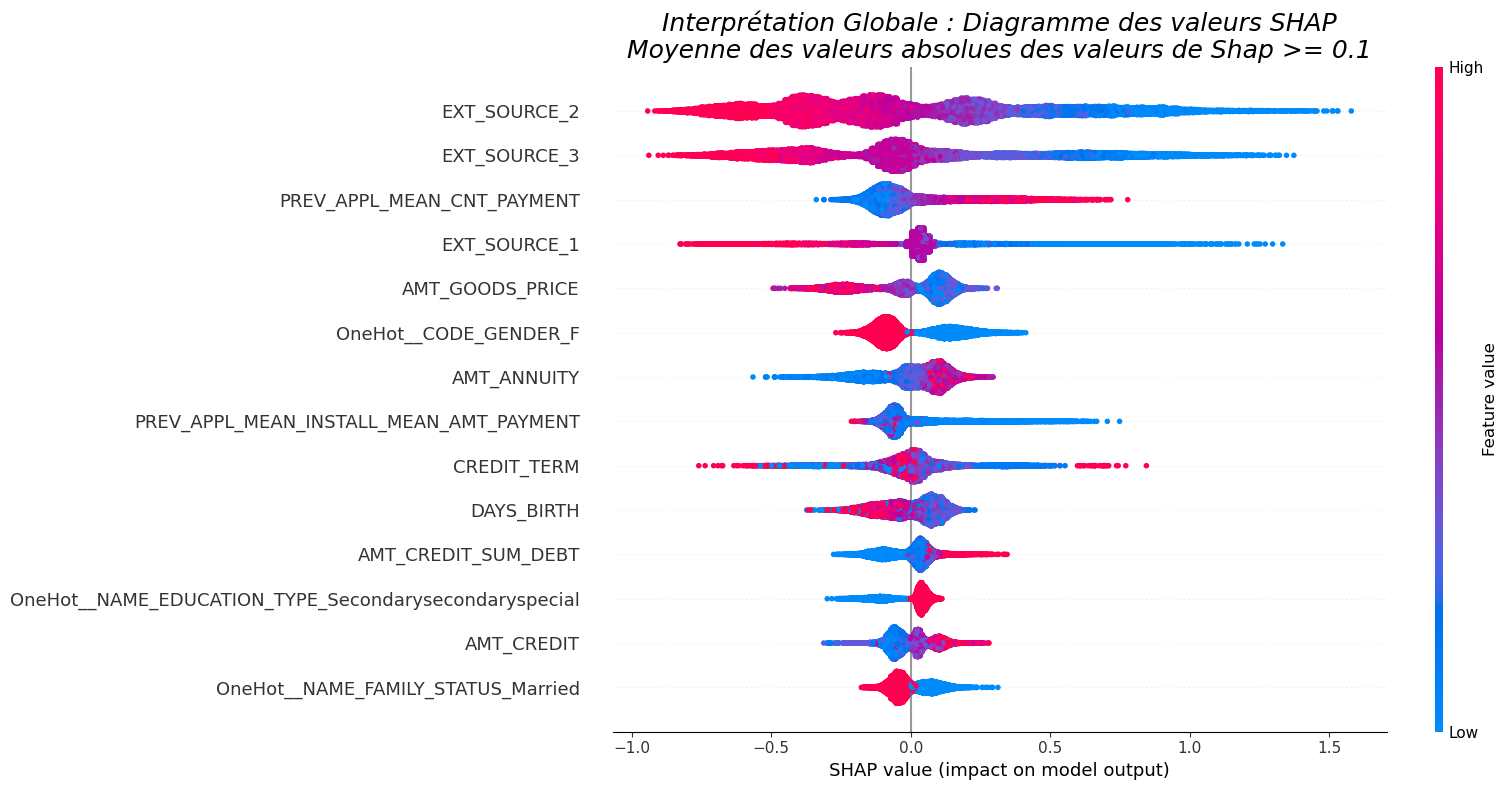

In [49]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=X_train_sample,
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 8),
                  plot_type="dot",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Graphiques des prédictions - 100 individus

In [50]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_train_sample.iloc[:100,:])

### Graphiques de dépendance

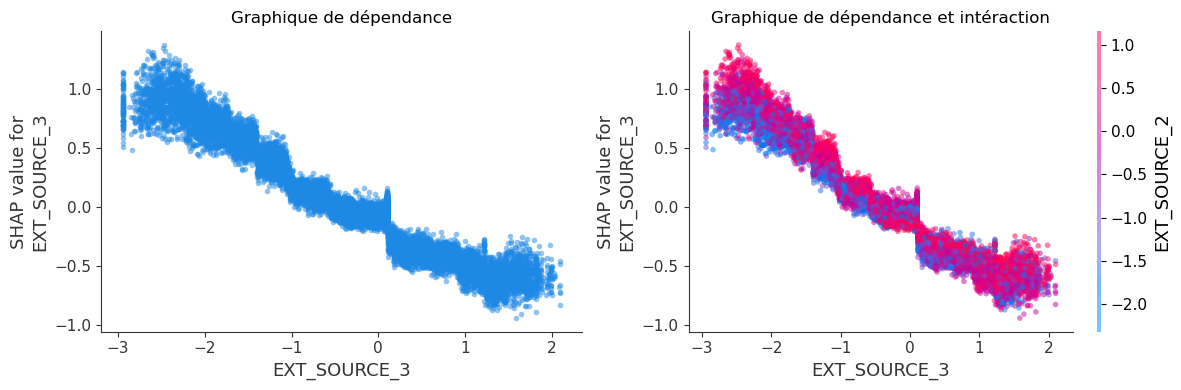

In [51]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1],X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

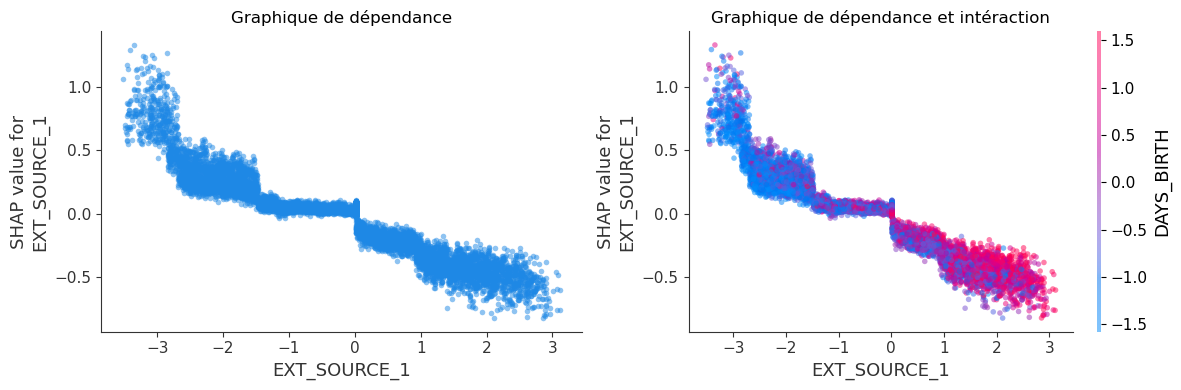

In [52]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

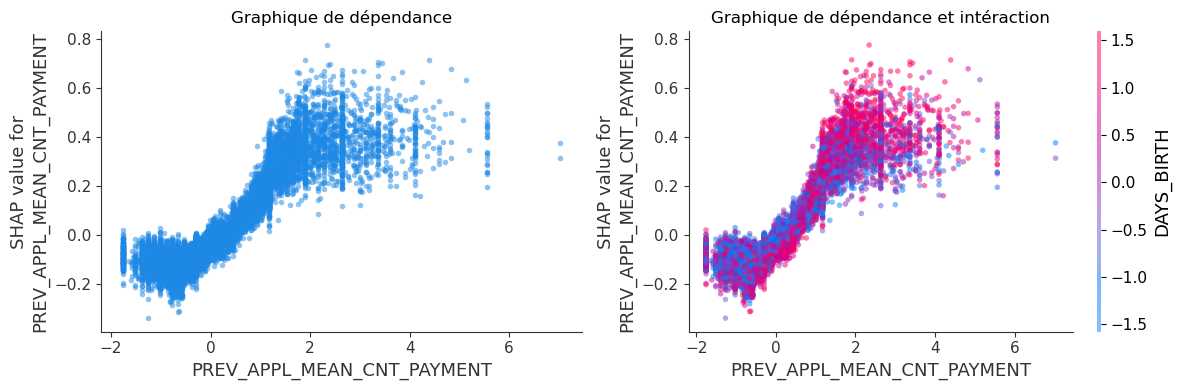

In [53]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

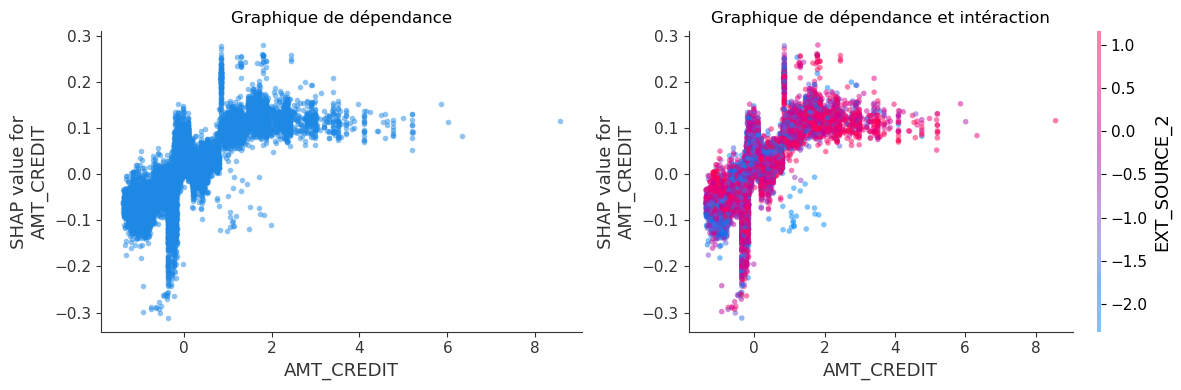

In [54]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("AMT_CREDIT", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("AMT_CREDIT", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

### PARTIE 2 - FEATURE IMPORTANCE LOCAL

In [55]:
shap_vals = explainer(X_train_sample)

In [56]:
len(shap_vals[0][:, 0].values)


191

### Exemple client 0

### Graphiques de décision - Version 1

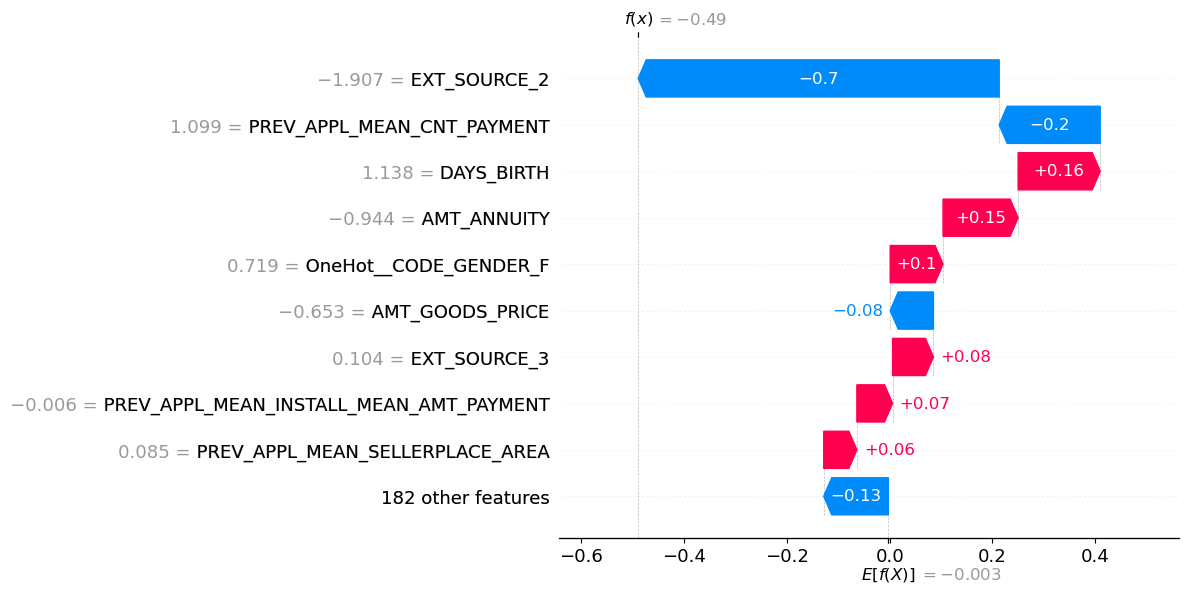

In [57]:
fig=shap.waterfall_plot(shap_vals[0][:, 0],show = False)

plt.show()

### Graphiques de décision - Version 2

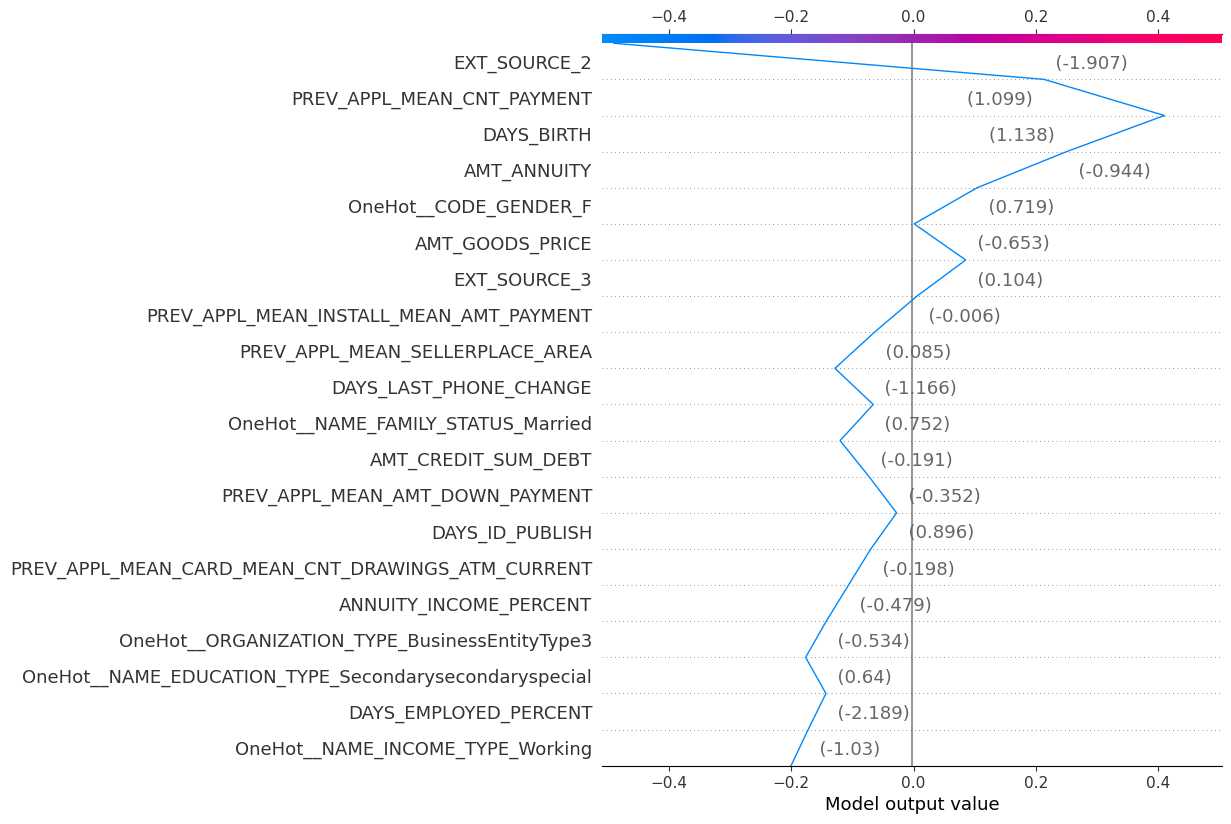

In [58]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][0,:], X_train_sample.iloc[0,:])

### Exemple client 10

### Graphiques de décision - Version 1

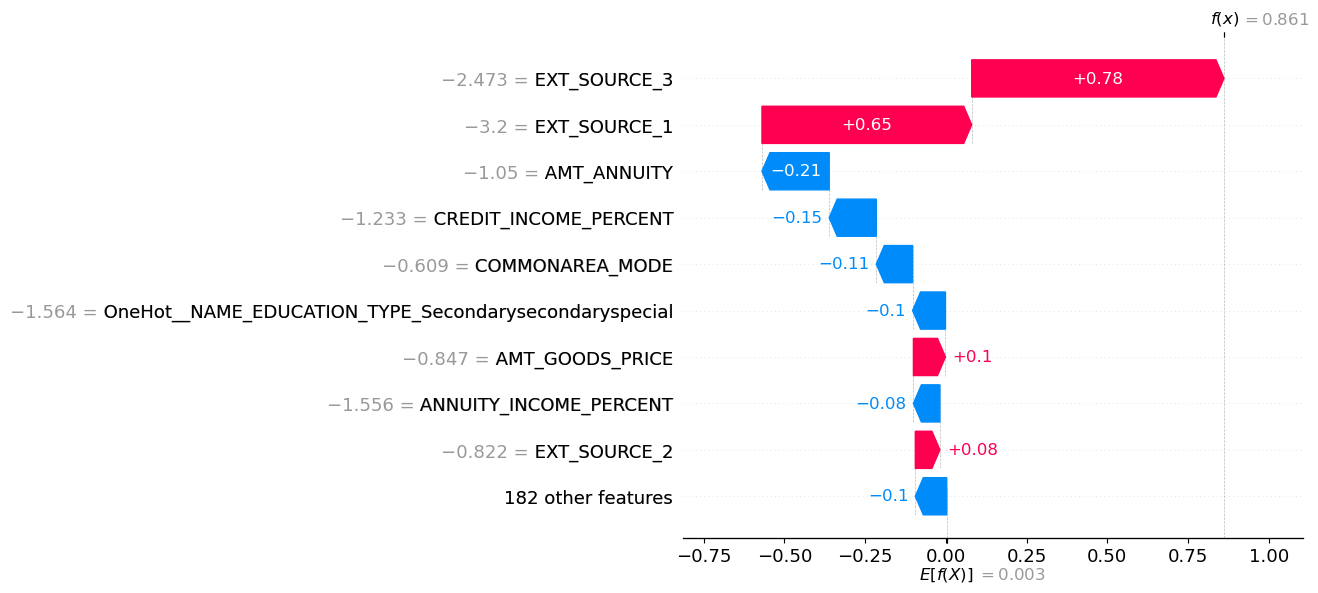

In [59]:
# shap local pour un client
shap.waterfall_plot(shap_vals[10][:, 1],show = False)
#plt.savefig('shap client 10 valid set tot', dpi = 200, bbox_inches = 'tight') 
plt.show()

### Graphiques de décision - Version 2

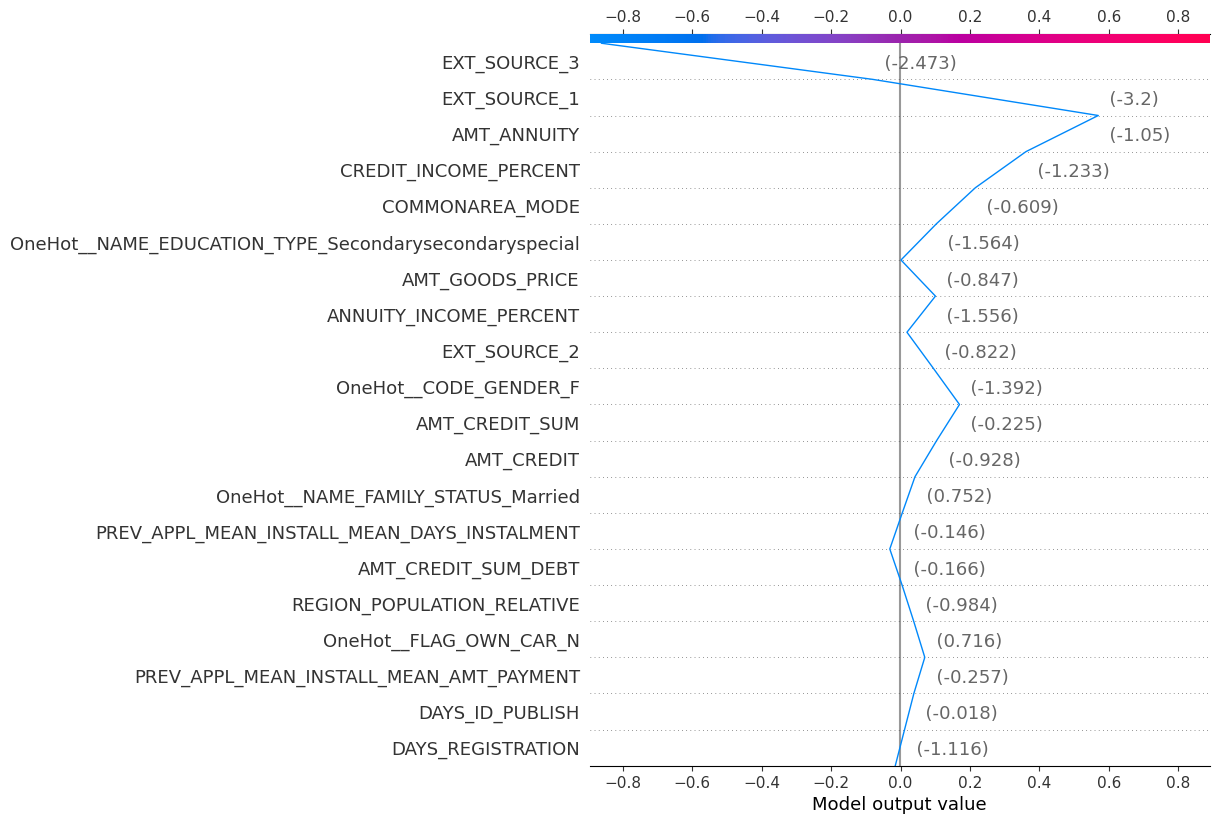

In [60]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][10,:], X_train_sample.iloc[10,:])

### Sérialisation

In [61]:
pickle_out = open("encodage.pkl","wb")
pickle.dump(best_LGBM[0], pickle_out)
pickle_out.close()

In [62]:
pickle_out = open("imputer.pkl","wb")
pickle.dump(best_LGBM[1], pickle_out)
pickle_out.close()

In [63]:
pickle_out = open("scale.pkl","wb")
pickle.dump(best_LGBM[2], pickle_out)
pickle_out.close()

In [64]:
pickle_out = open("sampler.pkl","wb")
pickle.dump(best_LGBM[3], pickle_out)
pickle_out.close()

In [65]:
pickle_out = open("estimateur.pkl","wb")
pickle.dump(best_LGBM[4], pickle_out)
pickle_out.close()

In [108]:
data_API = pd.read_csv('data_work/data_train.csv',nrows=500, sep ='\t')


In [109]:
data_API.head()

Unnamed: 0 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  AMT_INCOME_TOTAL  \
0           0         Cash loans           M            N          202500.0   
1           1         Cash loans           F            N          270000.0   
2           2    Revolving loans           M            Y           67500.0   
3           3         Cash loans           F            N          135000.0   
4           4         Cash loans           M            N          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0          Working   
1   1293502.5      35698.5        1129500.0    State servant   
2    135000.0       6750.0         135000.0          Working   
3    312682.5      29686.5         297000.0          Working   
4    513000.0      21865.5         513000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0  Secondary / secondary special  Single / not married   
1               Higher education               Married   
2  Secondary / secondary special  Single / not married   
3  Secondary / secondary special        Civil marriage   
4  Secondary / secondary special  Single / not married   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801   25.920548       1.745205           9.994521   
1                    0.003541   45.931507       3.254795           3.249315   
2                    0.010032   52.180822       0.616438          11.671233   
3                    0.008019   52.068493       8.326027          26.939726   
4                    0.028663   54.608219       8.323288          11.810959   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE OCCUPATION_TYPE  \
0         5.808219          9.0              0.0        Laborers   
1         0.797260          9.0              0.0      Core staff   
2         6.934247         26.0              1.0        Laborers   
3         6.676712          9.0              0.0        Laborers   
4         9.473973          9.0              0.0      Core staff   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                          2.0                  WEDNESDAY   
1                          1.0                     MONDAY   
2                          2.0                     MONDAY   
3                          2.0                  WEDNESDAY   
4                          2.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY       ORGANIZATION_TYPE  \
0                     10.0                     0.0  Business Entity Type 3   
1                     11.0                     0.0                  School   
2                      9.0                     0.0              Government   
3                     17.0                     0.0  Business Entity Type 3   
4                     11.0                     0.0                Religion   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376            0.0369   
1      0.311267      0.622246      0.533482            0.0529   
2      0.506155      0.555912      0.729567            0.0765   
3      0.506155      0.650442      0.533482            0.0765   
4      0.506155      0.322738      0.533482            0.0765   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                       0.9816           0.7552          0.0213   
3                       0.9816           0.7552          0.0213   
4                       0.9816           0.7552          0.0213   

   ENTRANCES_AVG  FLOORSMAX_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0690         0.0833        0.0369                0.0202   
1         0.0345         0.2917        0.0130                0.0773   
2         0.1379         0.1667        0.0482                0.0756

In [110]:
pickle_out = open("data.pkl","wb")
pickle.dump(data_API, pickle_out)
pickle_out.close()